Linear classification


In [44]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
dict=load_breast_cancer()
dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
dict.data.shape

(569, 30)

In [47]:
dict.target.shape

(569,)

In [48]:
df_x=pd.DataFrame(dict['data'],columns=dict['feature_names'])

In [49]:
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
df_y=pd.DataFrame(dict['target'],columns=['target'])

In [51]:
df_y.head() 

,target
0,0
1,0
2,0
3,0
4,0


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y)
R,C=X_train.shape

In [53]:
 from sklearn.preprocessing import StandardScaler
 scaler=StandardScaler()
 X_train=scaler.fit_transform(X_train)
 X_test=scaler.fit_transform(X_test)


In [54]:
model = tf.keras.models.Sequential([
            tf.keras.layers.sp(shape=(C,)),
            tf.keras.layers.Dense(1,activation='sigmoid')
        ])


model.compile(optimizer='adam',
        loss='binary_crossentropy',  
        metrics=['accuracy'])

r=model.fit(X_train, Y_train,
                    validation_data=(X_test,Y_test),
                    epochs=100)



Epoch 1/100
14/14 [==============================] - 1s 10ms/step - loss: 1.1468 - accuracy: 0.3357 - val_loss: 1.0621 - val_accuracy: 0.4406
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0215 - accuracy: 0.3920 - val_loss: 0.9535 - val_accuracy: 0.4965
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9106 - accuracy: 0.4460 - val_loss: 0.8569 - val_accuracy: 0.5524
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8142 - accuracy: 0.5188 - val_loss: 0.7720 - val_accuracy: 0.5944
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7312 - accuracy: 0.5845 - val_loss: 0.6991 - val_accuracy: 0.6573
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6595 - accuracy: 0.6338 - val_loss: 0.6387 - val_accuracy: 0.6853
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5997 - accuracy: 0.6784 - val_loss: 0.5874 - val_accuracy: 0.7273
Epoch 8/100


In [55]:
print("Train score = ",model.evaluate(X_train,Y_train))
print("Test score = ",model.evaluate(X_test,Y_test))

14/14 [==============================] - 0s 1ms/step - loss: 0.0933 - accuracy: 0.9812
Train score =  [0.0933113843202591, 0.9812206625938416]
5/5 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9790
Test score =  [0.09846771508455276, 0.9790209531784058]


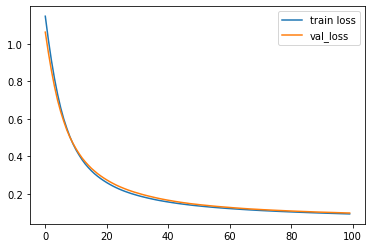

In [56]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

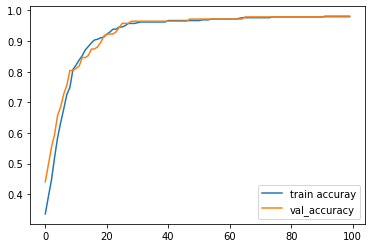

In [57]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [58]:
P=model.predict(X_test)

In [59]:
P

array([[8.9961922e-01],
       [8.4314644e-03],
       [6.5761548e-01],
       [8.8338751e-01],
       [9.6797276e-01],
       [9.9007690e-01],
       [7.9676211e-01],
       [9.0376765e-01],
       [1.3237298e-02],
       [7.9957426e-05],
       [9.4282138e-01],
       [9.8640060e-01],
       [6.3070846e-01],
       [9.6452302e-01],
       [9.9650097e-01],
       [1.1537671e-03],
       [7.8190714e-01],
       [9.9631131e-01],
       [9.6527076e-01],
       [7.1358085e-03],
       [2.7310698e-05],
       [4.5683980e-03],
       [9.9224305e-01],
       [9.9215651e-01],
       [9.8605210e-01],
       [9.8900443e-01],
       [9.7789842e-01],
       [1.3920963e-02],
       [9.9601781e-01],
       [1.3482571e-04],
       [8.4968895e-01],
       [2.5582761e-02],
       [8.3590889e-01],
       [3.0899554e-02],
       [9.9547589e-01],
       [9.9530798e-01],
       [9.7753477e-01],
       [1.7180741e-03],
       [9.3530124e-01],
       [9.4639230e-01],
       [1.2617707e-03],
       [2.983321

In [62]:
P=np.round(P).flatten()
P

array([1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1.], dtype=float32)

# Linear regression


In [15]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-08-29 09:36:58--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-08-29 09:36:58 (49.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [63]:
df=pd.read_csv('moore.csv',header=None)
df.columns=['year','ntrans']

In [27]:
df.head()

,year,ntrans
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [64]:
df['orig_ntrans']=df['ntrans'].copy()

In [65]:
df['ntrans']=np.log(df['ntrans'])

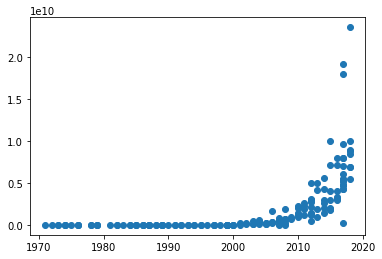

In [66]:
plt.scatter(df['year'],df['orig_ntrans'])

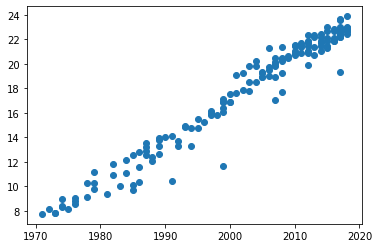

In [67]:
plt.scatter(df['year'],df['ntrans'])

In [68]:
X=df['year'].values.reshape(-1,1)
Y=df['ntrans'].values.reshape(-1,1)

In [69]:
# non si divide per la stdev perché poi un anno non rappresenterebbe più un anno reale 
X=X-X.mean()

In [70]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(1,)),
            tf.keras.layers.Dense(1)
        ])


model.compile(optimizer=tf.optimizers.SGD(0.001,0.9),loss='mse')

def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

r=model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 320.1445 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 288.0232 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 257.5804 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 214.6013 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 182.0898 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 157.1612 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 115.4671 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 72.7965 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 70.9723 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 47.1906 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

In [34]:
print("Train score = ",model.evaluate(X,Y))
#print("Test score = ",model.evaluate(X_test,Y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.8861
Train score =  0.8860704302787781


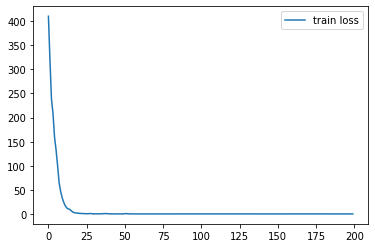

In [35]:
plt.plot(r.history['loss'],label='train loss')
plt.legend()

In [37]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.35089034]], dtype=float32), array([17.75866], dtype=float32)]


In [40]:
print(model.layers[0].get_weights()[0][0,0])
print(model.layers[0].get_weights()[1][0])

log_r=model.layers[0].get_weights()[0][0,0]
log_a0=model.layers[0].get_weights()[1][0]

0.35089034
17.75866


$$ log(C)=log(r)\cdot t+log(A_0)$$

$log(r)=0.35089034$

$log(A_0)=17.75866$

In [43]:
r=np.exp(log_r)
a0=np.exp(log_a0)

print("r=",r)
print("A_0=",a0)

r= 1.4203314
A_0= 51580764.0


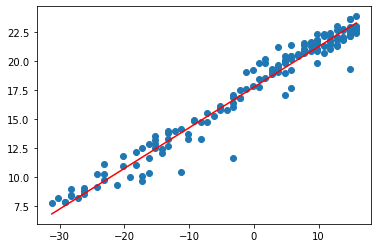

In [72]:
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat,'red')

In [74]:
model.save('blabla.h5')


model=tf.keras.models.load_model('blabla.h5')
model.predict(X) 

array([[ 6.8131647],
       [ 7.163968 ],
       [ 7.5147715],
       [ 7.5147715],
       [ 7.865575 ],
       [ 7.865575 ],
       [ 7.865575 ],
       [ 8.216378 ],
       [ 8.567182 ],
       [ 8.567182 ],
       [ 8.567182 ],
       [ 9.268788 ],
       [ 9.268788 ],
       [ 9.619592 ],
       [ 9.619592 ],
       [ 9.619592 ],
       [10.321198 ],
       [10.672002 ],
       [10.672002 ],
       [11.022804 ],
       [11.373608 ],
       [11.373608 ],
       [11.724411 ],
       [11.724411 ],
       [11.724411 ],
       [12.075214 ],
       [12.075214 ],
       [12.075214 ],
       [12.426018 ],
       [12.426018 ],
       [12.426018 ],
       [12.426018 ],
       [12.776821 ],
       [12.776821 ],
       [13.1276245],
       [13.1276245],
       [13.1276245],
       [13.1276245],
       [13.478428 ],
       [13.829231 ],
       [13.829231 ],
       [14.180035 ],
       [14.180035 ],
       [14.530838 ],
       [14.530838 ],
       [14.881641 ],
       [14.881641 ],
       [15.23